# KNN (implementation)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [ ]:
# calc_all_distancies takes each point from 
#test sample and calculates the distance 
#to each point from main sample

In [3]:
def calc_all_distancies(data_x, unknown):
    dists = []
    for x in unknown:
        dists.append([np.linalg.norm(x - i) for i in data_x])
    return np.array(dists)

In [ ]:
# predict takes distances to each point 
#from main sample, 
#sorts it in descending order 
#chooses the k smallest distances and points respectively
#From this chosen distances counts frequences of classes 
#(to which belongs this chosen points)
#if the mode is equal for each class 
#function takes the smallest distance
#else the most frequently occured

In [4]:
def predict(dists, data_y, k):
    num_pred = dists.shape[0] 
    y_pred = np.zeros(num_pred)
    
    for j in range(num_pred):
        dst = dists[j]
        closest_y = data_y[dst.argsort()[:k]]
        moda = stats.mode(closest_y, None)
        if moda.count[0] == 1:
            y_pred[j] = closest_y[0]
        else:
            y_pred[j] = moda.mode
    return y_pred

In [ ]:
# Function takes training and test samples 
# Classifies test points
# return dictionary of accuracy and missrecognized points

In [5]:
def classification(data_x, data_y, test_x, test_y, k):
    distancies = calc_all_distancies(data_x,test_x)
    yp = predict(distancies, data_y, k)
    ac = sum(yp == test_y)/len(test_y)*100.
    cond = yp!=test_y
    d = {'accuracy' : ac, 'miss_points' : test_x[cond]}
    return d

# Checking on dataset

In [6]:
data = pd.read_excel('C:\\Users\\Galia\\desktop\\wine2.xlsx')
X = data[['Alcogol', 'OD OD280/OD315 of diluted wines']]
Y = data.Site
X = X.as_matrix()
Y = Y.as_matrix()

In [ ]:
#randomly chose training and test sets
#training - 0.67, the reat - test sample

In [8]:
ratio = 0.67
n = data.shape[0]
n_trn = int(ratio*n)
ind = np.random.permutation(n)
X = X[ind]
Y = Y[ind]
x_trn = X[: n_trn]
y_trn = Y[: n_trn]
x_tst = X[n_trn:]
y_tst = Y[n_trn:]


In [ ]:
#apply knn classification

In [10]:
m = classification(x_trn, y_trn, x_tst, y_tst, 2)

# Graphical illustrations 

In [ ]:
# green, yellow, violet - all initial data 
# bib light blue - randomly choosen test sample
# light red - missclassified points

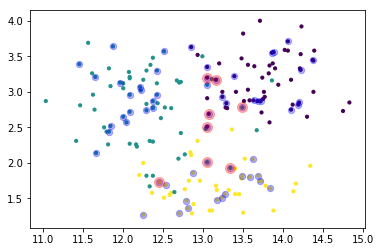

In [12]:
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap='viridis', s = 10)
plt.scatter(x_tst[:,0],x_tst[:,1], color='b', s = 40, alpha=0.3)
plt.scatter(m['miss_points'][:,0], m['miss_points'][:,1], color='r', s = 100, alpha=0.3)
plt.show()